<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [1]:
# a)
import random

def rollDie():
    value = 0
    while True:
        rand = random.randint(1,36)
        if rand == 1:
            value = 1
        elif rand in range(4):
            value = 2
        elif rand in range(7):
            value = 3
        elif rand in range(11):
            value = 4
        elif rand in range(16):
            value = 5
        elif rand in range(22):
            value = 6
        elif rand in range(29):
            value = 7
        elif rand in range(37):
            value = 8
        yield value  

throw = rollDie()

print(next(throw))
print(type(throw))



4
<class 'generator'>


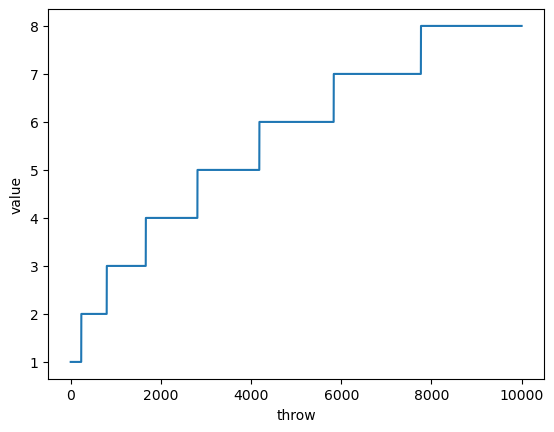

In [121]:
# b)
import matplotlib.pyplot as plt

%matplotlib inline

throws =[]
i = 0
while i < 10000:
    throws.append(next(throw))
    i += 1
    
throws.sort()
# print(throws)


plt.plot(throws)      

plt.ylabel('value')
plt.xlabel('throw')

plt.show()


In [139]:
# c)
import time


def rollDie():
    value = 0
    value_set = set()
    start_time = time.time_ns()
    while True:
        rand = random.randint(1,36)
        if rand == 1:
            value = 1
        elif rand in range(4):
            value = 2
        elif rand in range(7):
            value = 3
        elif rand in range(11):
            value = 4
        elif rand in range(16):
            value = 5
        elif rand in range(22):
            value = 6
        elif rand in range(29):
            value = 7
        elif rand in range(37):
            value = 8
        yield value 
        
        if value in value_set:
            pass
        else:
            value_set.add(value)
            
        if len(value_set) == 8:
            total_time = time.time_ns() - start_time
            return total_time
        
         
        
throw = rollDie()        
     
while True:
    try:
        x = next(throw)
        print(x)
    except StopIteration as e:
        print("time passed in nanoseconds:", e.value)
        break


4
3
5
5
8
5
7
8
5
4
6
6
7
8
4
6
5
8
4
8
3
8
3
6
4
5
4
4
6
6
6
7
6
5
7
5
8
6
8
5
4
7
8
8
4
6
4
2
6
7
8
8
8
4
8
6
2
8
5
6
7
6
4
5
7
8
4
1
time passed in nanoseconds: 553256


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [141]:
class Elevator:
    def __init__(self, number_of_floors = 10, users = 10, travel_time = 5, stop_time = 10):
        self.number_of_floors = number_of_floors
        self.users = users
        self.floor = 0
        self.direction = "up"
        self.travel_time = travel_time
        self.stop_time = stop_time
        
        self.elapse = 0  # attr to document time travelled
        self.passenger_load = []  # attr to document passengers currently in elevator
        self.backlog = set()   # attr to document which floors to travel to
        self.stops = {}  # attr to document stops per floor
        self.log = {0: 0}  # attr to document elapsed time vs current floor
        
        self.setup()
        
    def setup(self):
        """used to simulate the defined numbers of users all calling the elevator from random floors travelling to random floors"""
        names = ['Bernhard', 'Silvia', 'Martin', 'Noemi', 'Maria', 'Andi', 'Franz', 'Christine', 'Manfred', 'Ulli']
        self.passengers = {}
        while self.users > 0:
            enter = random.randint(0, self.number_of_floors)
            exit = random.randint(0, self.number_of_floors)
            while enter == exit:
                exit = random.randint(0, self.number_of_floors)
            self.passengers.update({names[self.users-1]:{"enter": enter, "exit": exit}})
            
            self.users -= 1
         
        print(self.passengers)
        
        
    def start(self):
        """if a users wants to enter in the ground floor, then start with a stop, else run"""
        for passenger in self.passengers:
            self.backlog.add(self.passengers[passenger]["enter"])
        
        if self.floor in self.backlog:
            self.stop()
        else:
            self.run()
    
    def run(self):
        """decides, whether the elevator should move or stop"""
        if self.floor in self.backlog:
            self.stop()
        else:
            self.move()
     
    def move(self):
        """Moves the elevator one floor"""
        if self.floor == 0 or min(self.backlog) > self.floor:
            self.direction = "up"
        if self.number_of_floors == self.floor or max(self.backlog) < self.floor:
            self.direction = "down"
        if self.direction == "up":
            self.floor += 1
            self.elapse += self.travel_time
            self.log.update({self.elapse:self.floor})
        else:
            self.floor -= 1
            self.elapse += self.travel_time
            self.log.update({self.elapse:self.floor})
        #print(f'moved to floor {self.floor}')
        #print(self.log)
        self.run()
        
    def stop(self):
        """Simulates a stop of the elevator"""
    # updating time, positional log, backlog and stops counter
        self.elapse += self.stop_time
        self.log.update({self.elapse:self.floor})
        self.backlog.remove(self.floor)
        if self.floor in self.stops:
            self.stops[self.floor] += 1
        else:
            self.stops[self.floor] = 1 
    # travellers exiting the elevator
        for passenger in self.passenger_load:
            if self.passengers[passenger]["exit"] == self.floor:
                self.passengers[passenger]["exit"] ="exited"
                self.passenger_load.remove(passenger)
    
    
    # travellers entering the elevator
        self.passenger_load += [key for key, value in self.passengers.items() if value["enter"]==self.floor]
        
        for passenger in self.passenger_load:
            self.passengers[passenger]["enter"] = "entered"
            if isinstance(self.passengers[passenger]["exit"], int):
                self.backlog.add(self.passengers[passenger]["exit"])

         
        
        print(' ')
        print(f'stopped at floor {self.floor}')
        print(f'time since start: {self.elapse} seconds')
        print(f'passengers in the elevator: {self.passenger_load}')
        print(f'floors to visit: {self.backlog}')
        print(f'stops per floor: {self.stops}')
        #print(f'state of travellers: {self.passengers}')
        
        if not self.backlog:
            print(' ')
            print('The elevator is empty')
        else:
            self.run()
        
        
    #def start(self):
        
        
    #def simulate(self, users):
        
            
            
        
test=Elevator(10,10)
test.start()





{'Ulli': {'enter': 9, 'exit': 2}, 'Manfred': {'enter': 6, 'exit': 1}, 'Christine': {'enter': 3, 'exit': 1}, 'Franz': {'enter': 8, 'exit': 7}, 'Andi': {'enter': 4, 'exit': 5}, 'Maria': {'enter': 6, 'exit': 2}, 'Noemi': {'enter': 6, 'exit': 5}, 'Martin': {'enter': 9, 'exit': 1}, 'Silvia': {'enter': 1, 'exit': 6}, 'Bernhard': {'enter': 7, 'exit': 0}}
 
stopped at floor 1
time since start: 15 seconds
passengers in the elevator: ['Silvia']
floors to visit: {3, 4, 6, 7, 8, 9}
stops per floor: {1: 1}
 
stopped at floor 3
time since start: 35 seconds
passengers in the elevator: ['Silvia', 'Christine']
floors to visit: {1, 4, 6, 7, 8, 9}
stops per floor: {1: 1, 3: 1}
 
stopped at floor 4
time since start: 50 seconds
passengers in the elevator: ['Silvia', 'Christine', 'Andi']
floors to visit: {1, 5, 6, 7, 8, 9}
stops per floor: {1: 1, 3: 1, 4: 1}
 
stopped at floor 5
time since start: 65 seconds
passengers in the elevator: ['Silvia', 'Christine']
floors to visit: {1, 6, 7, 8, 9}
stops per floor:

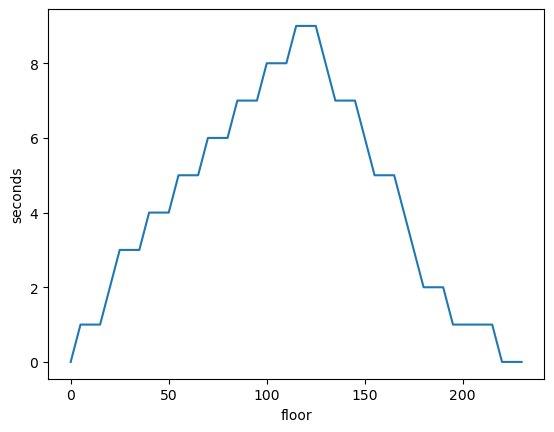

In [142]:
# plotting the log-dictionary to illustrate the movement of the elevator
plt.plot(*zip(*sorted(test.log.items())))


plt.ylabel('seconds')
plt.xlabel('floor')

plt.show()


{'Ulli': {'enter': 3, 'exit': 9}, 'Manfred': {'enter': 5, 'exit': 7}, 'Christine': {'enter': 5, 'exit': 9}, 'Franz': {'enter': 0, 'exit': 6}, 'Andi': {'enter': 0, 'exit': 4}, 'Maria': {'enter': 4, 'exit': 3}, 'Noemi': {'enter': 8, 'exit': 1}, 'Martin': {'enter': 4, 'exit': 3}, 'Silvia': {'enter': 3, 'exit': 1}, 'Bernhard': {'enter': 1, 'exit': 8}}
{'Ulli': {'arrival': 124, 'enter': 5, 'exit': 4}, 'Manfred': {'arrival': 90, 'enter': 8, 'exit': 7}, 'Christine': {'arrival': 170, 'enter': 1, 'exit': 8}, 'Franz': {'arrival': 50, 'enter': 9, 'exit': 10}, 'Andi': {'arrival': 169, 'enter': 9, 'exit': 10}, 'Maria': {'arrival': 112, 'enter': 8, 'exit': 0}, 'Noemi': {'arrival': 170, 'enter': 6, 'exit': 4}, 'Martin': {'arrival': 153, 'enter': 8, 'exit': 5}, 'Silvia': {'arrival': 5, 'enter': 4, 'exit': 0}, 'Bernhard': {'arrival': 116, 'enter': 5, 'exit': 6}}
